# Aanegola Generation
After seeing the results of all the 'perfect' maze generators I wanted to create a maze that wasn't so perfect. I wanted a maze that was very sparse, had a lot of empty space and looked nothing like a maze. The idea was derived from paintball arenas which tend to be relatively open but have some obstacles to take shelter behind. 

## How does it work?
The algorithm is really simple. We simply traverse through the entire maze node by node, and make a list of the possible directions edges can be added. We then choose one path for the corner nodes, two for the edge nodes, and three for the other nodes. However, we do not ensure that the paths have to be distinct, and the same path can be removed multiple times (effective number of paths added will reduce).

## Will it always be connected?
No! Since the maze generation is entirely probabalistic, there is no guaruntee that the algorithm generates a connected maze. In a situation where two nodes next to each other select {N, N, N} and {S, S, S} respectively (ie they're only connected to each other) and the other nodes adjacent to them never select a path that leads them to this pair, we will obtain an isolated 'island'. However, the probability of island creation is very very low. 

In [109]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze

In [110]:
def AanegolaGen(maze):
    for x in range(0, maze.num_columns):
        for y in range(0, maze.num_rows):
            choices = []
            
            if x != 0:
                choices.append('W')
            if x != maze.num_columns-1:
                choices.append('E')
            if y != 0:
                choices.append('N')
            if y != maze.num_rows-1:
                choices.append('S')
            
            if len(choices) == 2:
                direction = random.choice(choices)
                maze.add_path((x, y), direction, 0)
            elif len(choices) == 3:
                direction = random.choice(choices)
                maze.add_path((x, y), direction, 0)
                direction = random.choice(choices)
                maze.add_path((x, y), direction, 0)
            elif len(choices) == 4:
                direction = random.choice(choices)
                maze.add_path((x, y), direction, 0)
                direction = random.choice(choices)
                maze.add_path((x, y), direction, 0)
                direction = random.choice(choices)
                maze.add_path((x, y), direction, 0)

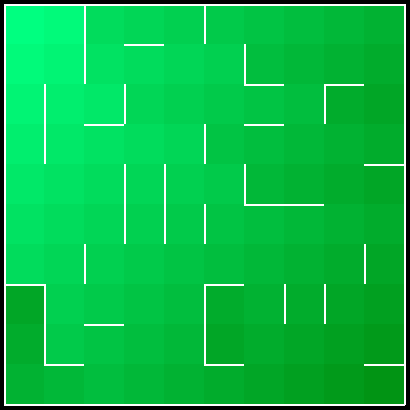

In [116]:
maze = Maze(10, 10)
AanegolaGen(maze)
maze.add_colors(color=(0, 256, 128))
display(maze.draw(cell_width=40))

## Basic Analysis
### Time complexity : O(n<sup>2</sup>)
The algorithm makes only one pass over every node, and hence in O(n<sup>2</sup>) time. 
### Additional space : O(1)
We only requre a list that stores up to 4 elements for the algorithm to work, and hence not much additional space is required.
### Bias
The algorithm is heavily biased to have large open spaces. However since it is entirely probabalistic, mazes generated by this algo can have some odditites. On average, we do not have any radical bias apart from the openness. 

In [117]:
total = {"Deadends": 0, "Straightways": 0, "LeftTurns": 0, "RightTurns": 0, "Junctions": 0, "Crossroads": 0}
for i in range(0, 100):
    maze = Maze(100, 100)
    AanegolaGen(maze)
    partial = maze.benchmark()
    total["Deadends"] += partial["Deadends"]
    total["Straightways"] += partial["Straightways"]
    total["LeftTurns"] += partial["LeftTurns"]
    total["RightTurns"] += partial["RightTurns"]
    total["Junctions"] += partial["Junctions"]
    total["Crossroads"] += partial["Crossroads"]

div = 0
for i in total:
    div += total[i]

for i in total:
    total[i] /= div
    total[i] *= 100
    round(total[i], 3)

for i in total:
    print("%12s %s %3f" % (i, " : ", total[i]))

    Deadends  :  0.718100
Straightways  :  4.389500
   LeftTurns  :  4.452100
  RightTurns  :  4.453400
   Junctions  :  46.080300
  Crossroads  :  39.906600


### Further analysis
As we can see, the number of junctions and crossroads is extremely high when compared to deadends, straightways and turns. This indicates a bias towards large open areas in the maze which was what the maze was intended to do. This algorithm also creates the need for a new 'unconnected' class of nodes which can exist only in imperfect maze creation, where not all nodes are connected.